In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator, Aer
import numpy as np

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


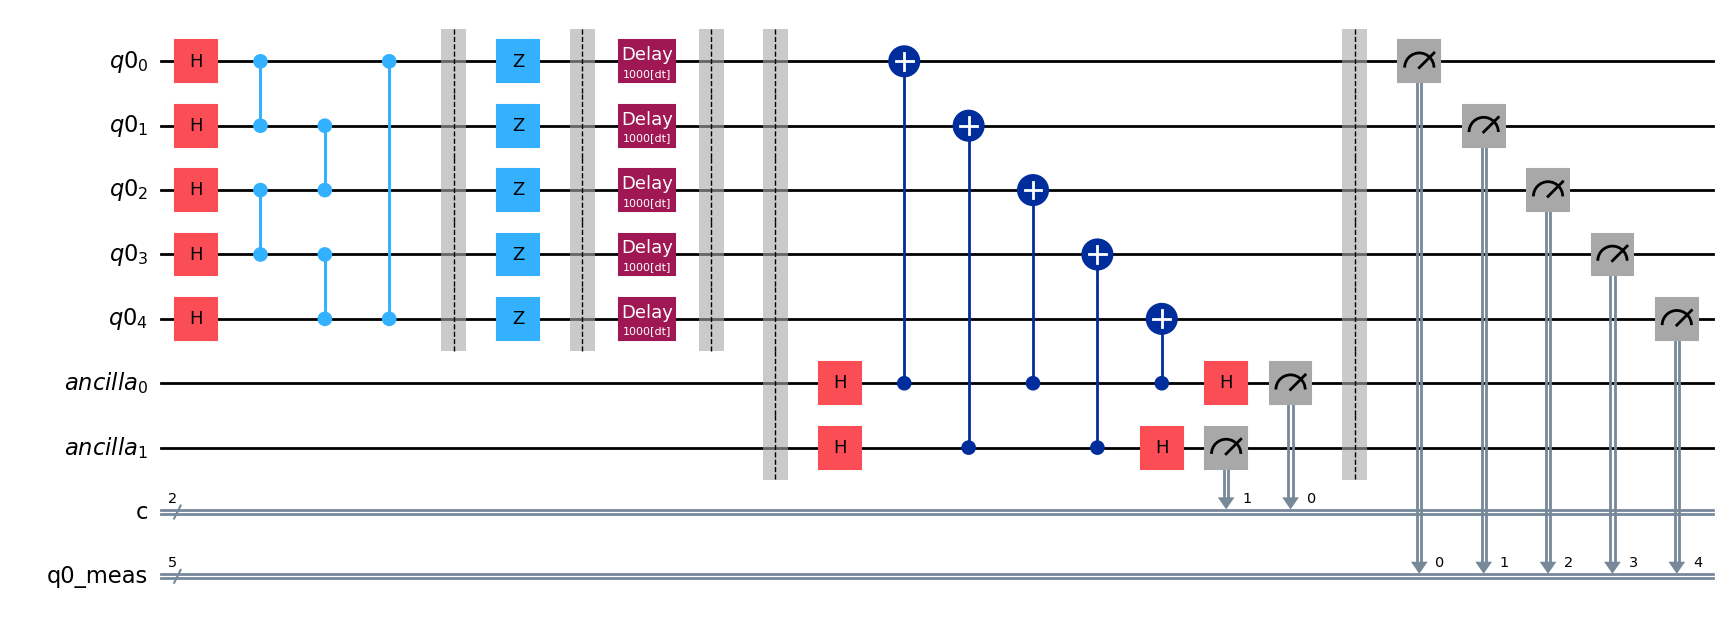

In [3]:


def load_circuit(delay):
    qc = FiveQbStabilizerCodeCircuit(1)

    type = '-'
    qc.encode(type=type) # |-> logico
    qc.z()  # pasar a |+> logico
    
    qc.delay(delay)

    pc = qc.physical_circuit

    pc.add_register(QuantumRegister(2, 'ancilla'))
    pc.barrier()


    pc.h([5, 6])
    pc.cx(5, 0)
    pc.cx(5, 2)
    pc.cx(5, 4)
    pc.cx(6, 1)
    pc.cx(6, 3)
    pc.h([5, 6])

    pc.add_register(ClassicalRegister(2, 'c'))
    pc.measure([5, 6], [0, 1])

    qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [11]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_kyiv")

In [12]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 13
Transpiled Circuit Depth: 49


In [13]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [ ]:
# t_array = [t*2_000 for t in range(0, 6)] # brisbane
t_array = [t*4_500 for t in range(0, 6)] # kyiv
print([round(t*dt * 10**(-3), 3) for t in t_array])


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [ ]:

circuits = []

for t in t_array:

    qc = load_circuit(t)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=20,
                                initial_layout = [60, 53, 61, 59, 41, 42, 43]
                                )
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    print(get_layout(circuits[-1], qb_len=7))
    # c.draw(output='mpl')

Circuit Depth: 47
Delay Duration: 0.0 us
Total Duration: 9.934 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_32144\189383895.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 49
Delay Duration: 1.0 us
Total Duration: 10.937 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_32144\189383895.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 49
Delay Duration: 2.0 us
Total Duration: 11.936 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_32144\189383895.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 49
Delay Duration: 3.0 us
Total Duration: 12.935 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_32144\189383895.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 48
Delay Duration: 4.0 us
Total Duration: 13.934 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_32144\189383895.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 49
Delay Duration: 5.0 us
Total Duration: 14.937 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_32144\189383895.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [19]:
for c in circuits:
    print(get_layout(c, qb_len=7))

[60, 53, 61, 59, 41, 42, 43]
[60, 53, 61, 59, 41, 42, 43]
[60, 53, 61, 59, 41, 42, 43]
[60, 53, 61, 59, 41, 42, 43]
[60, 53, 61, 59, 41, 42, 43]
[60, 53, 61, 59, 41, 42, 43]


In [14]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)
reg = 'c'
print(f" {reg}: {simulation_result.data[reg].get_counts()}")


 c: {'11': 1558, '00': 1642}


In [36]:
test_qc = FiveQbStabilizerCodeCircuit(1)

test_qc.encode(type='-')
test_qc.z()

pc = test_qc.physical_circuit
pc.add_register(QuantumRegister(2, 'ancilla'))

pc.h([5, 6])
pc.cx(5, 0)
pc.cx(5, 2)
pc.cx(5, 4)
pc.cx(6, 1)
pc.cx(6, 3)
pc.h([5, 6])


statevector = statevector_simulation(test_qc.physical_circuit, qb_len=7)

anc_count = {
    '00': 0,
    '01': 0,
    '10': 0,
    '11': 0
}
for s in statevector:
    anc_count[s[-2:]] += np.abs(statevector[s])**2

print(*[f"{s}: {round(anc_count[s],2)}" for s in anc_count], sep='\n')


00: 0.5
01: 0
10: 0
11: 0.5


In [24]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
job = service.job('cykz0tknrmz0008tv140') # kyiv, shots = 3200, t_array = [t*4_500 for t in range(0, 6)]


pub_result = job.result()


In [68]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]
anc_states = ['00', '11', '01', '10']

results = []
ancilla_results = []
logical_meas_results = []

for i in range(len(t_array)):
    result = pub_result[i]
    
    meas = result['__value__']['data']['q0_meas'].get_counts()
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k] / shots * 100 # %
    results.append(res)

    meas = result['__value__']['data']['c'].get_counts()
    anc = {}
    for k in anc_states:
        k_inv = k[::-1]
        anc[k] = meas[k_inv] if k_inv in meas else 0
        anc[k] = anc[k] / shots * 100 # %
    ancilla_results.append(anc)

    count = {}

    count['+'] = anc['00'] + anc['11']
    count['-'] = anc['01'] + anc['10']

    logical_meas_results.append(count)



In [69]:
for i in range(len(t_array)):
    print(logical_meas_results[i])
    print(f"TVD: {round(logical_meas_results[i]['-'], 2)}%")

{'+': 84.3125, '-': 15.6875}
TVD: 15.69%
{'+': 77.40625, '-': 22.59375}
TVD: 22.59%
{'+': 67.46875, '-': 32.53125}
TVD: 32.53%
{'+': 59.0625, '-': 40.9375}
TVD: 40.94%
{'+': 55.09375, '-': 44.90625}
TVD: 44.91%
{'+': 53.21875, '-': 46.78125}
TVD: 46.78%


In [70]:

delays = [round(t*dt/1000) for t in t_array]


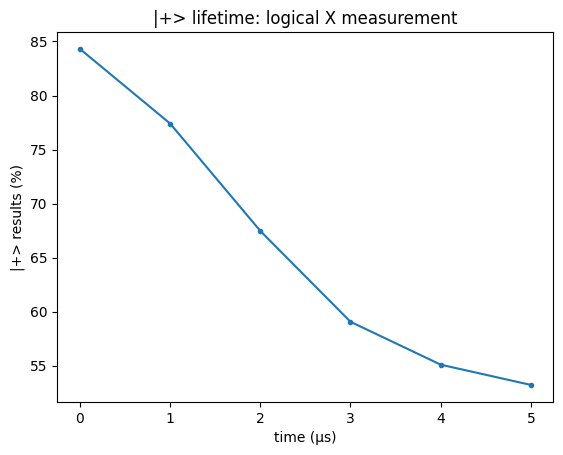

In [71]:
import matplotlib.pyplot as plt

x = delays

y = [logical_meas_results[i]['+'] for i in range(len(x))]

plt.plot(x, y, '.-')

plt.xlabel('time (μs)')
plt.ylabel('|+> results (%)')
plt.title('|+> lifetime: logical X measurement')

plt.show()

In [74]:
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in anc_states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(ancilla_results[i][s]*shots/100) for s in anc_states], sep='\t ')

 delay (μs)	 00	 11	 01	 10
----------------------------------------------------------------------------------
 0		 1339	 1359	 236	 266
 1		 1237	 1240	 340	 383
 2		 1009	 1150	 491	 550
 3		 882	 1008	 586	 724
 4		 839	 924	 699	 738
 5		 816	 887	 708	 789


In [75]:

# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 delay (μs)	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 0		 103	 116	 91	 74	 89	 105	 102	 107	 89	 91	 104	 124	 94	 122	 87	 102	 77	 94	 100	 144	 98	 92	 76	 103	 117	 112	 96	 84	 93	 102	 114	 98
 1		 106	 103	 80	 118	 73	 97	 98	 110	 94	 94	 117	 104	 114	 128	 75	 126	 96	 96	 99	 132	 100	 87	 68	 102	 112	 134	 97	 90	 67	 101	 88	 94
 2		 100	 114	 100	 74	 91	 112	 96	 118	 95	 86	 99	 93	 90	 107	 74	 117	 111	 113	 104	 99	 113	 115	 69	 108	 105	 111	 101	 90	 77	 113	 98	 107
 3		 130	 110	 107	 101	 61	 99	 87	 128	 76	 89	 98	 97	 101	 126	 77	 111	 108	 92	 76	 109	 103	 88	 85	 106	 118	 93	 120	 86	 92	 105	 115	 106
 4		 104	 126	 99	 98	 96	 108	 90	 122	 101	 107	 102	 97	 95	 120	 81	 96	 91	 109	 1

In [76]:
valid_states = states

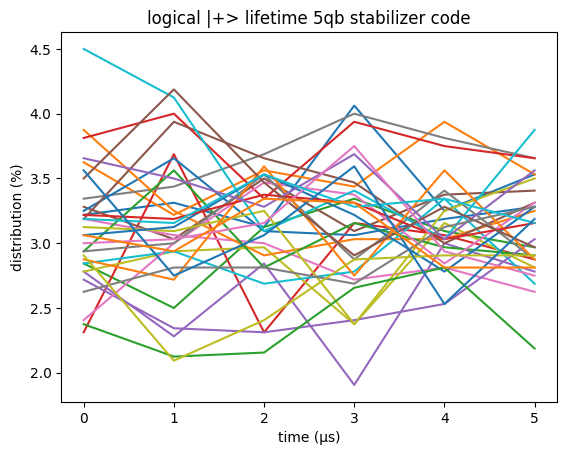

In [77]:
import matplotlib.pyplot as plt
import math

# x = [math.log(d) for d in delays]
x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime 5qb stabilizer code')
# plt.legend()

# Display the plot
plt.show()

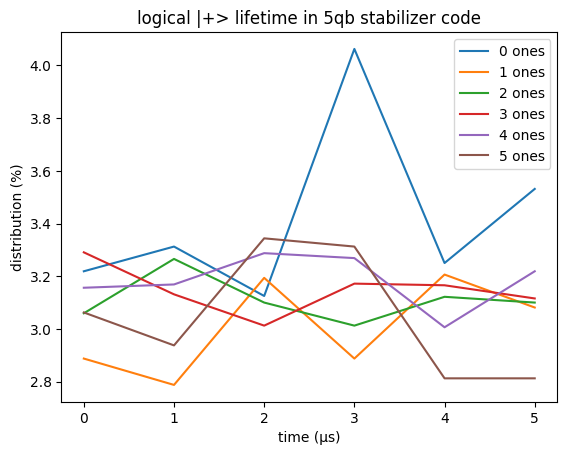

In [78]:

for n in [0,1,2,3,4,5]:

    n_ones_states = [s for s in states if sum([int(i) for i in s]) == n]
    plt.plot(x, [sum([r[s] for s in n_ones_states])/len(n_ones_states) for r in results], label=f"{n} ones")



# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in 5qb stabilizer code')
plt.legend()

# Display the plot
plt.show()

TVD

In [79]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


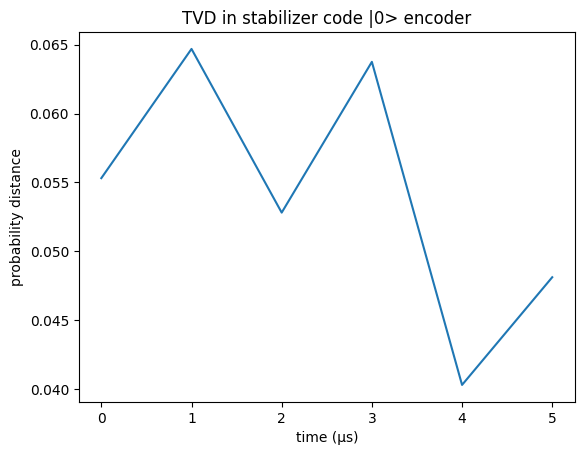

In [80]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in stabilizer code |0> encoder')

# Display the plot
plt.show()

In [81]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 4.03%


TVD (ancilla results)

In [82]:
valid_states = ['00', '11']

In [83]:
alpha = {}

for s in anc_states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


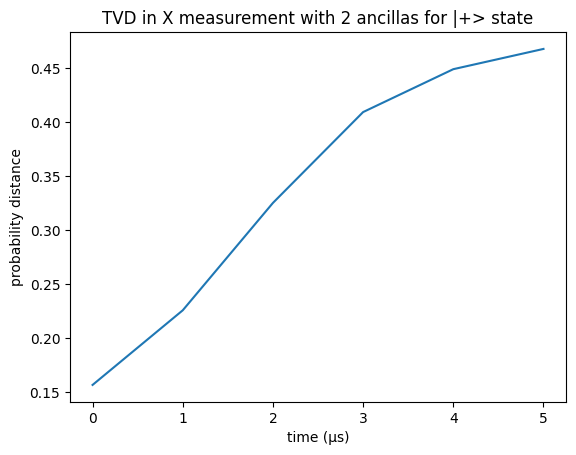

In [86]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in anc_states])/2 for r in ancilla_results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in X measurement with 2 ancillas for |+> state')

# Display the plot
plt.show()

In [85]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 15.69%
